In [1]:
#import libraries
import pandas as pd

In [2]:
#import data
df=pd.read_csv(r"C:\Users\srinivas\Desktop\data set\Flight_Booking.csv")
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
df=df.drop(columns=["Unnamed: 0"])

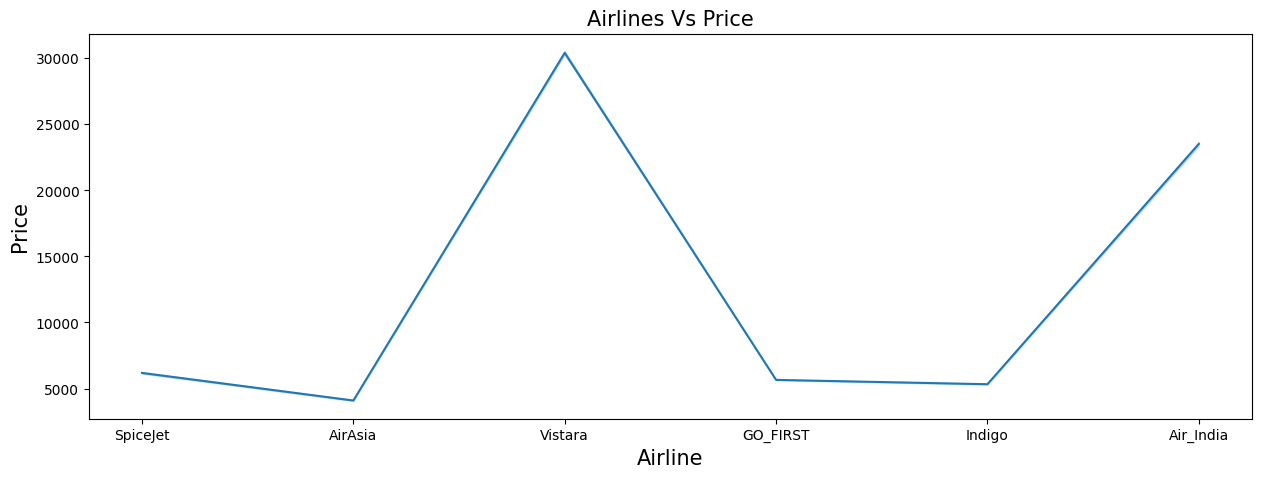

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))
sns.lineplot(x=df['airline'],y=df['price'])
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

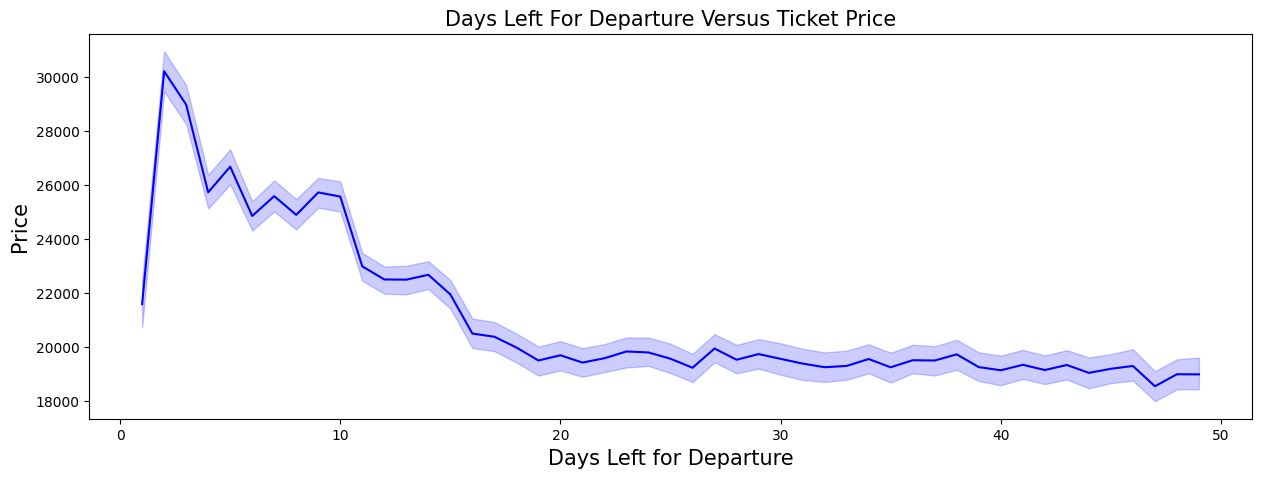

In [5]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=15)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [6]:
df["airline"].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

<Axes: xlabel='airline', ylabel='price'>

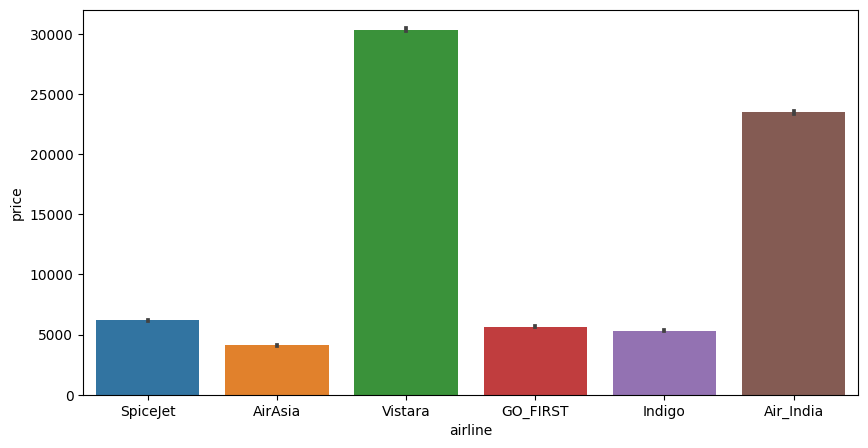

In [7]:
plt.figure(figsize=(10,5));
sns.barplot(x='airline',y='price',data=df)

<Axes: xlabel='class', ylabel='price'>

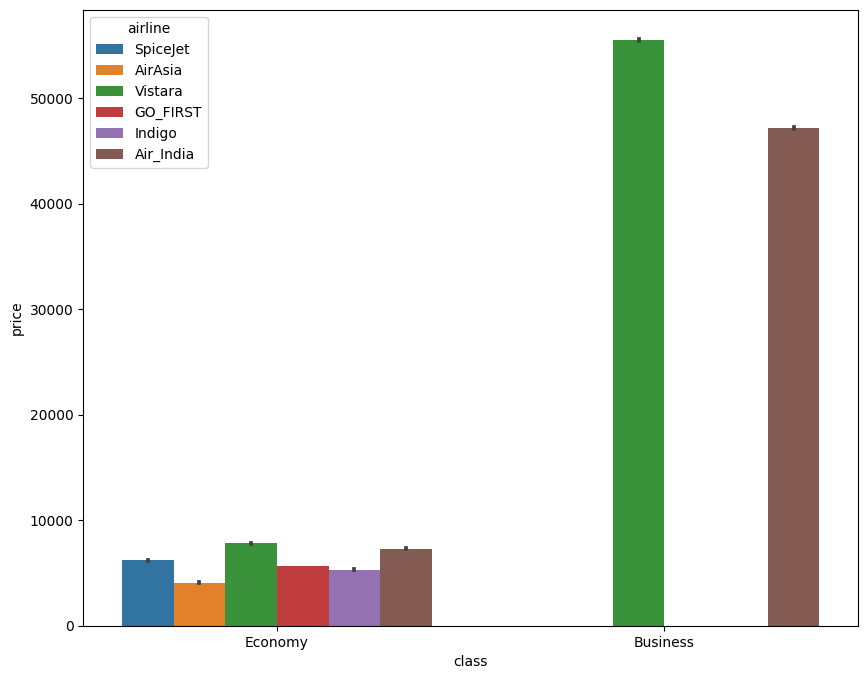

In [8]:
plt.figure(figsize=(10,8));
sns.barplot(x='class',y='price',data=df,hue='airline')

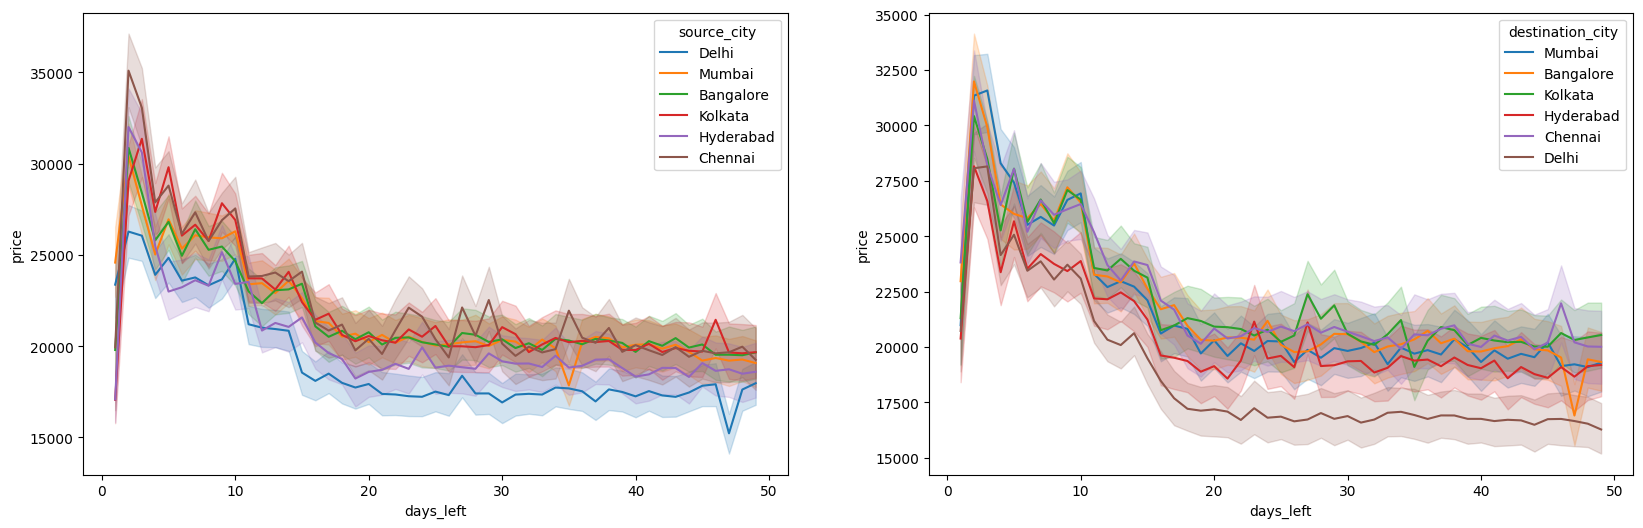

In [9]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x='days_left',y='price',data=df,hue='source_city',ax=ax[0])
sns.lineplot(x='days_left',y='price',data=df,hue='destination_city',ax=ax[1])
plt.show()

<Axes: xlabel='days_left', ylabel='price'>

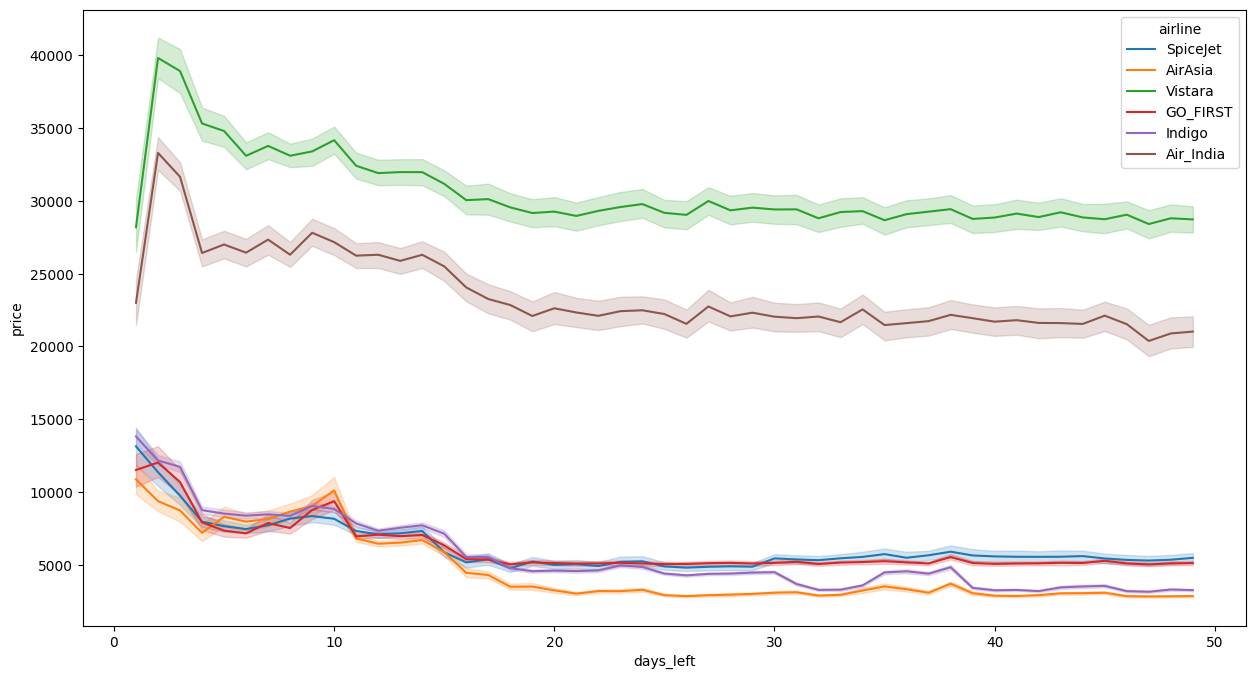

In [10]:
plt.figure(figsize=(15,8))
sns.lineplot(x='days_left',y='price',data=df,hue='airline')

<Axes: xlabel='destination_city', ylabel='price'>

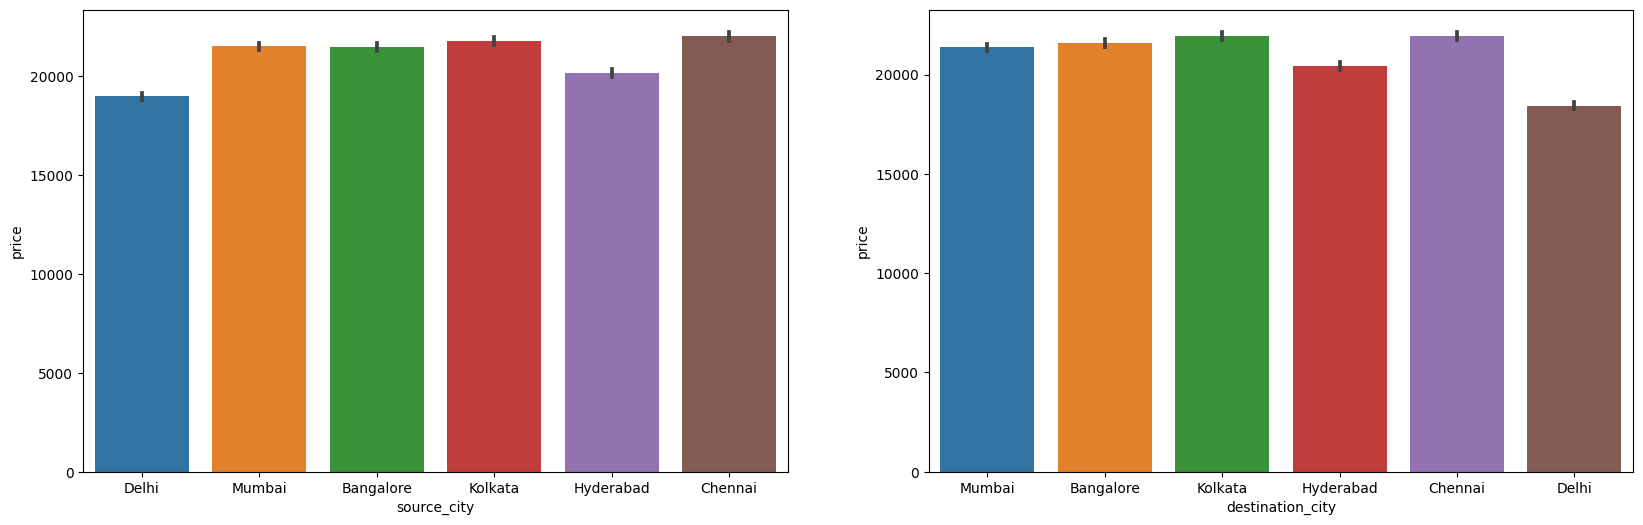

In [11]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.barplot(x='source_city',y='price',data=df,ax=ax[0])
sns.barplot(x='destination_city',y='price',data=df,ax=ax[1])

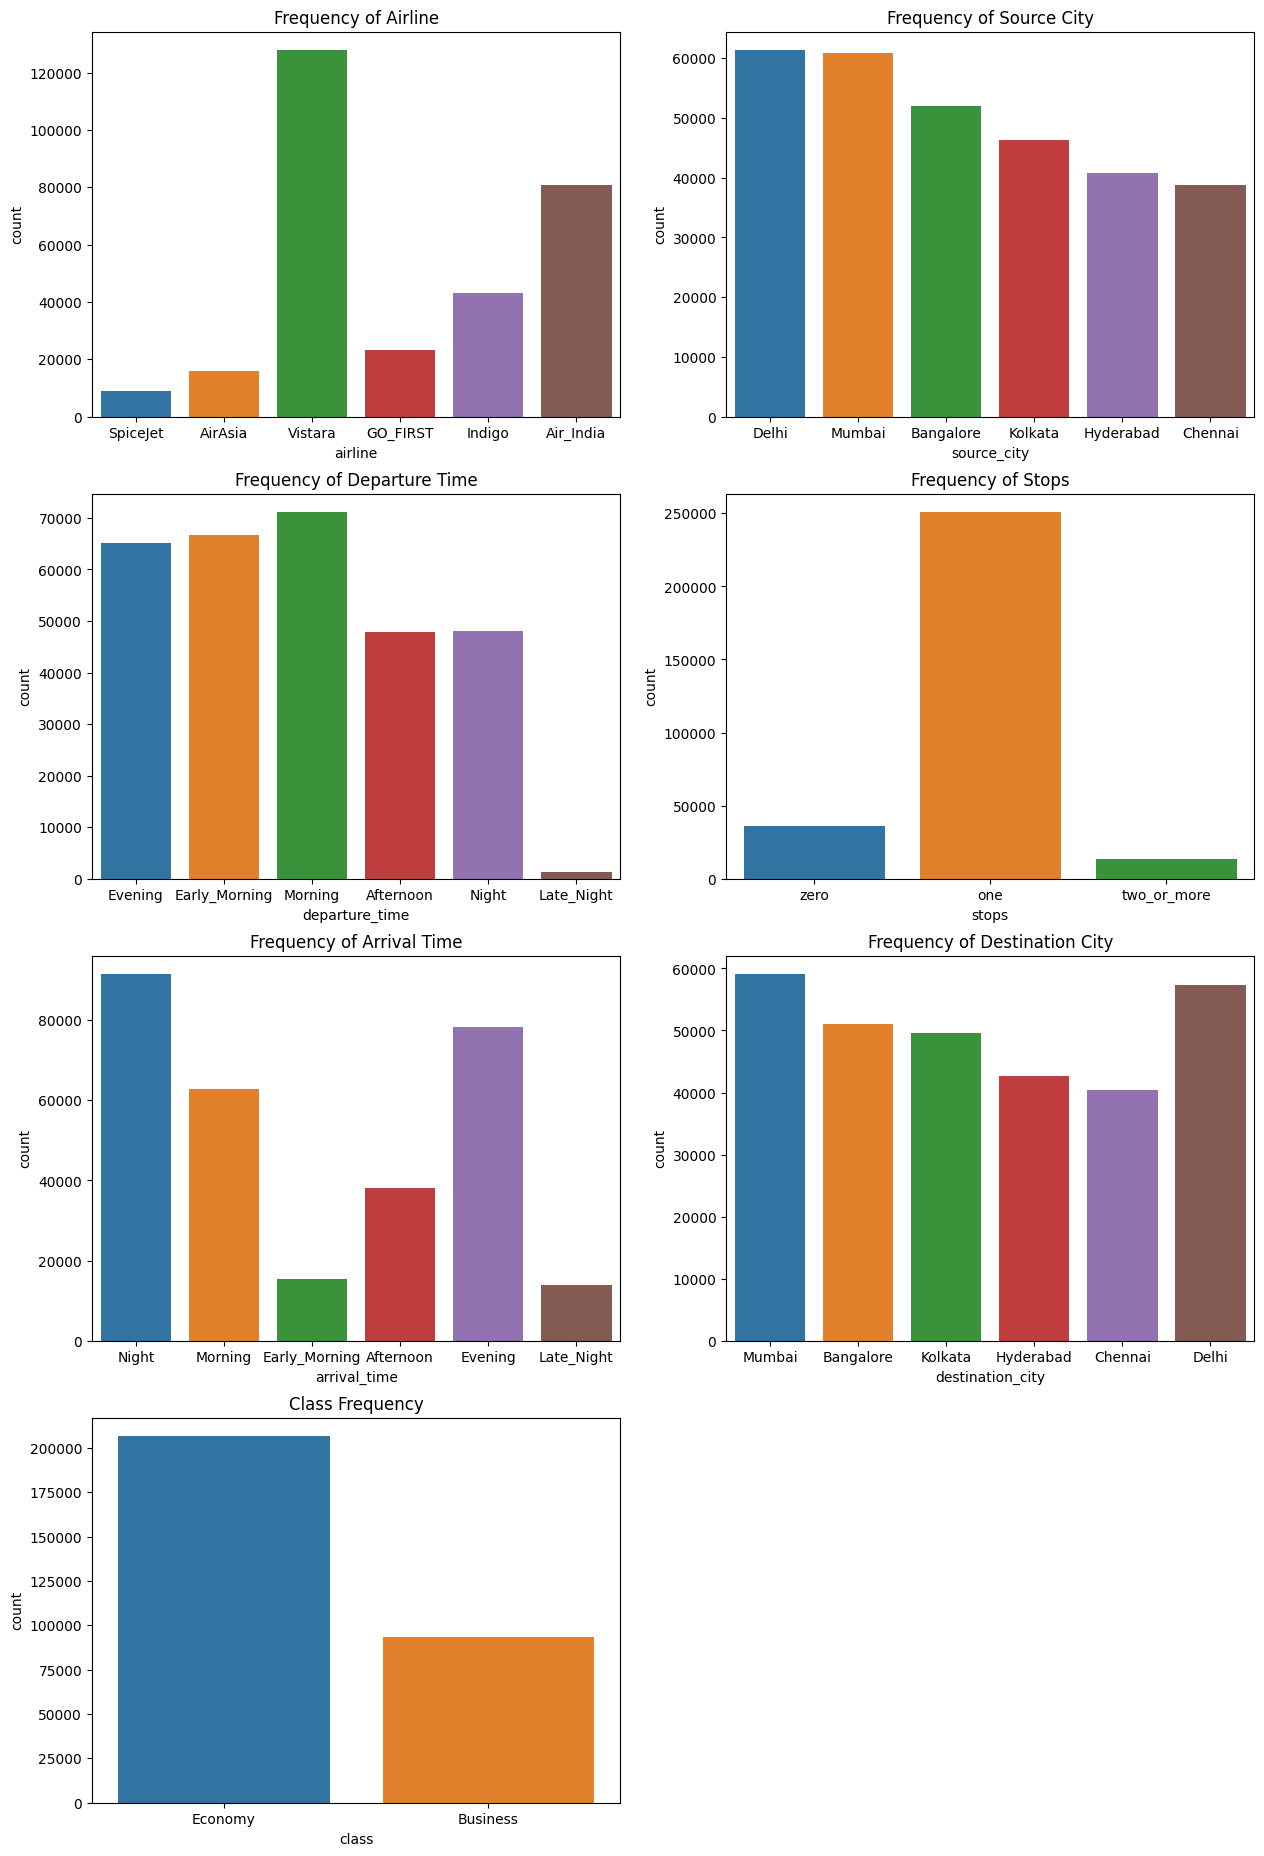

In [12]:
# Visualizations of categoric features with countplot
plt.figure(figsize=(15,23))
plt.subplot(4, 2, 1)
sns.countplot(x=df["airline"], data=df)
plt.title("Frequency of Airline")
plt.subplot(4, 2, 2)
sns.countplot(x=df["source_city"], data=df)
plt.title("Frequency of Source City")
plt.subplot(4, 2, 3)
sns.countplot(x=df["departure_time"], data=df)
plt.title("Frequency of Departure Time")
plt.subplot(4, 2, 4)
sns.countplot(x=df["stops"], data=df)
plt.title("Frequency of Stops")
plt.subplot(4, 2, 5)
sns.countplot(x=df["arrival_time"], data=df)
plt.title("Frequency of Arrival Time")
plt.subplot(4, 2, 6)
sns.countplot(x=df["destination_city"], data=df)
plt.title("Frequency of Destination City")
plt.subplot(4, 2, 7)
sns.countplot(x=df["class"], data=df)
plt.title("Class Frequency")
plt.show()


<Axes: >

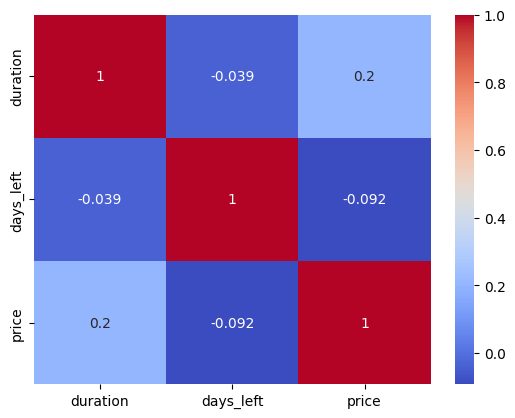

In [13]:

df2=df[['duration','days_left','price']]
sns.heatmap(df2.corr(),annot=True,cmap="coolwarm")

In [14]:
df["stops"]=df["stops"].replace(["zero","one","two_or_more"],[0,1,2])
df3=df[["stops",'duration','days_left','price']]

<Axes: >

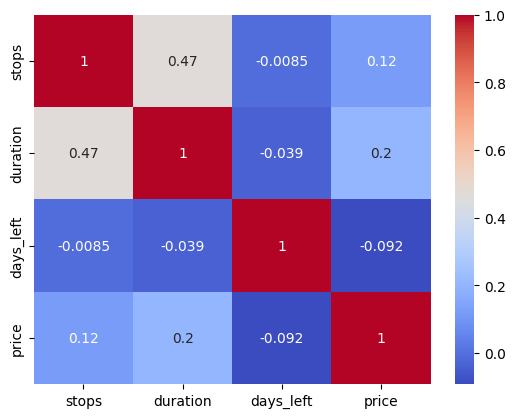

In [15]:
sns.heatmap(df3.corr(),annot=True,cmap="coolwarm")

In [16]:
df3.corr()

,stops,duration,days_left,price
stops,1.000000,0.468059,-0.008540,0.119648
duration,0.468059,1.000000,-0.039157,0.204222
days_left,-0.008540,-0.039157,1.000000,-0.091949
price,0.119648,0.204222,-0.091949,1.000000


In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["airline"]=le.fit_transform(df["airline"])
df["flight"]=le.fit_transform(df["flight"])
df["source_city"]=le.fit_transform(df["source_city"])
df["departure_time"]=le.fit_transform(df["departure_time"])
df["arrival_time"]=le.fit_transform(df["arrival_time"])
df["destination_city"]=le.fit_transform(df["destination_city"])
df["class"]=le.fit_transform(df["class"])


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  int32  
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(3)
memory usage: 17.2 MB


In [19]:
df=df.drop("flight",axis=1)

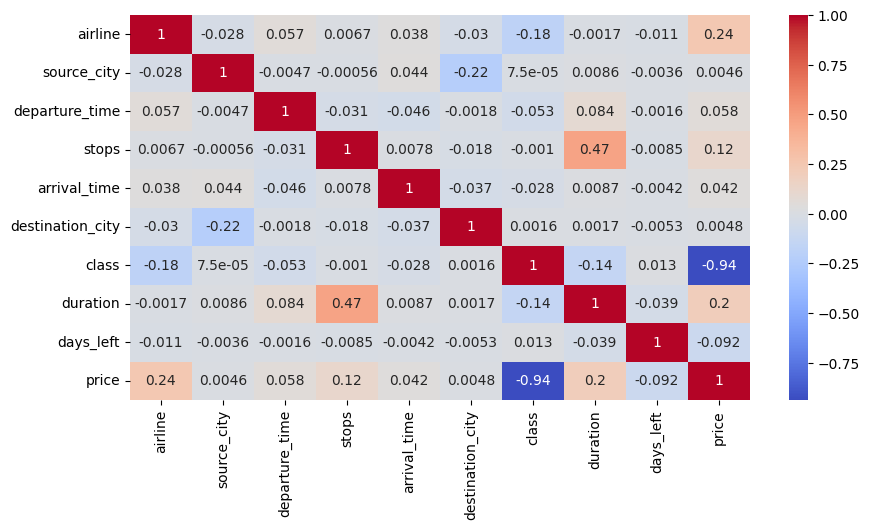

In [20]:

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    
    if ((df[col].dtype != 'object') & (col != 'price') ):
        col_list.append(col)
X = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
print(vif_data)

            feature       VIF
0           airline  3.461766
1       source_city  2.933064
2    departure_time  2.746367
3             stops  7.464236
4      arrival_time  3.684695
5  destination_city  2.893218
6             class  2.917521
7          duration  5.037943
8         days_left  4.035735


In [23]:
df=df.drop(columns=["stops"])

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    
    if ((df[col].dtype != 'object') & (col != 'price') ):
        col_list.append(col)
X = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
print(vif_data)

            feature       VIF
0           airline  3.370020
1       source_city  2.895803
2    departure_time  2.746255
3      arrival_time  3.632792
4  destination_city  2.857808
5             class  2.776721
6          duration  3.429344
7         days_left  3.950132


In [25]:
X = df.drop(columns=["price"])
y = df['price']

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
random_state=42)

In [28]:
# linear regression

In [29]:
model=LinearRegression()

In [30]:
from sklearn.preprocessing import StandardScaler


In [31]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [32]:
model.fit(x_train,y_train)

LinearRegression()

In [33]:
x_test

array([[-1.15009744, -0.33003243,  0.90291402, ...,  0.67246146,
         1.04760002,  1.03096515],
       [ 1.03227296,  0.81160707,  0.90291402, ..., -1.48707407,
        -0.33126787,  1.17836796],
       [ 1.03227296,  0.81160707,  0.90291402, ...,  0.67246146,
        -0.23813869,  1.10466656],
       ...,
       [-1.15009744,  0.24078732, -0.80832578, ...,  0.67246146,
         0.18997755,  0.14654831],
       [-0.05891224,  0.24078732, -0.23791252, ...,  0.67246146,
        -1.41962831,  1.03096515],
       [ 1.03227296, -0.90085218,  1.47332728, ..., -1.48707407,
         1.83572309, -1.69598679]])

In [34]:
y_pred=model.predict(x_test)
y_pred

array([ 4673.75531857, 51713.74471978,  6610.89765756, ...,
        4974.9626779 ,  2729.6500662 , 59638.74859827])

In [35]:
from sklearn.metrics import r2_score
r2result= r2_score(y_test,y_pred)
r2_score(y_test,y_pred)

0.897752737512321

In [36]:
from sklearn import metrics
mean_abs_error= metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error

4468.426673542267

In [37]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.34765804610685463

In [38]:
mean_sq_error=metrics.mean_squared_error(y_test,y_pred)
mean_sq_error

52706651.3333421

In [39]:
import numpy as np
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
root_mean_sq_error

7259.934664536734

C:\Users\srinivas\AppData\Local\Temp\ipykernel_13580\1514020514.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label="Actual")
C:\Users\srinivas\AppData\Local\Temp\ipykernel_13580\1514020514.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label="Predicted")


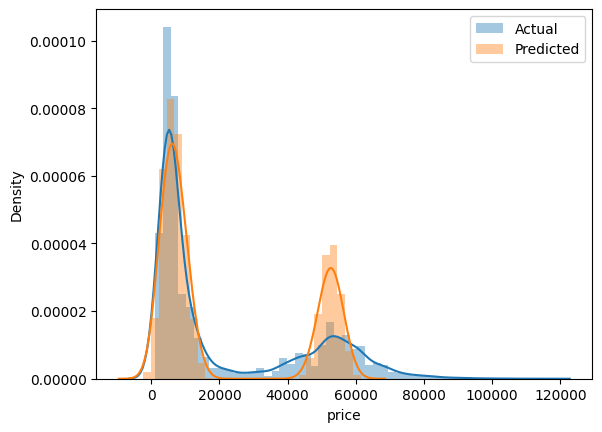

In [40]:
sns.distplot(y_test,label="Actual")
sns.distplot(y_pred,label="Predicted")
plt.legend()

In [41]:
# decision tree model

In [42]:
 from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
r2_score(y_test,y_pred)


0.9845139851468654

In [43]:
from sklearn import metrics
mean_abs_error= metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error

1124.007180917583

In [44]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)


0.07337079077772585

In [45]:
mean_sq_error=metrics.mean_squared_error(y_test,y_pred)
mean_sq_error

7982766.1450151885

In [46]:
import numpy as np
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
root_mean_sq_error

2825.378938304593

C:\Users\srinivas\AppData\Local\Temp\ipykernel_13580\919026962.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label="Actual")
C:\Users\srinivas\AppData\Local\Temp\ipykernel_13580\919026962.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label="Predicted")


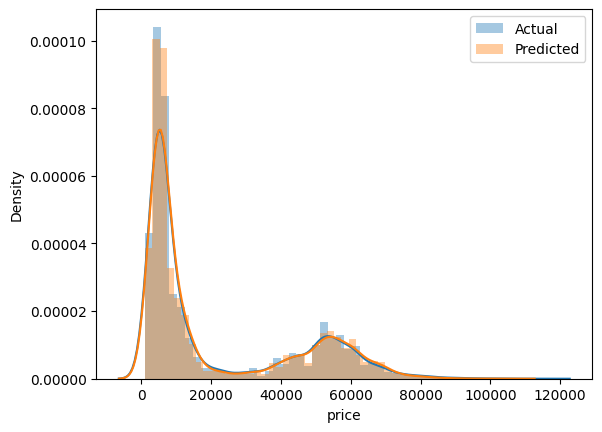

In [47]:
sns.distplot(y_test,label="Actual")
sns.distplot(y_pred,label="Predicted")
plt.legend()


In [ ]:
# comparision of different model as per R(square)

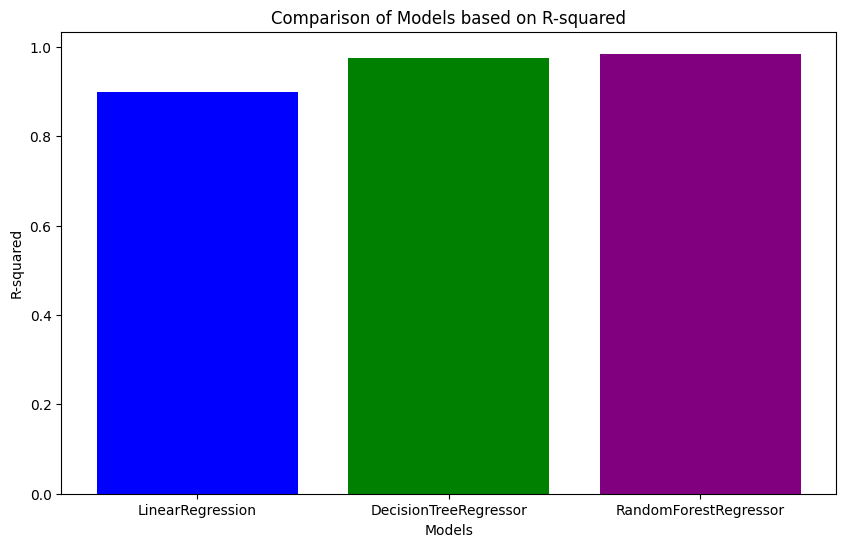

In [48]:
# R-squared values for different models
models = ['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor' ]
r_squared = [0.897752737512321 , 0.9746798050021364,0.9845174836070605 ]
# Set the figure size
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'purple']
# Create a bar plot
plt.bar(models, r_squared, color=colors)
# Add labels and title
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('Comparison of Models based on R-squared')
# Show the plot
plt.show()


In [ ]:
# comparision of different models as per different mean absolute error

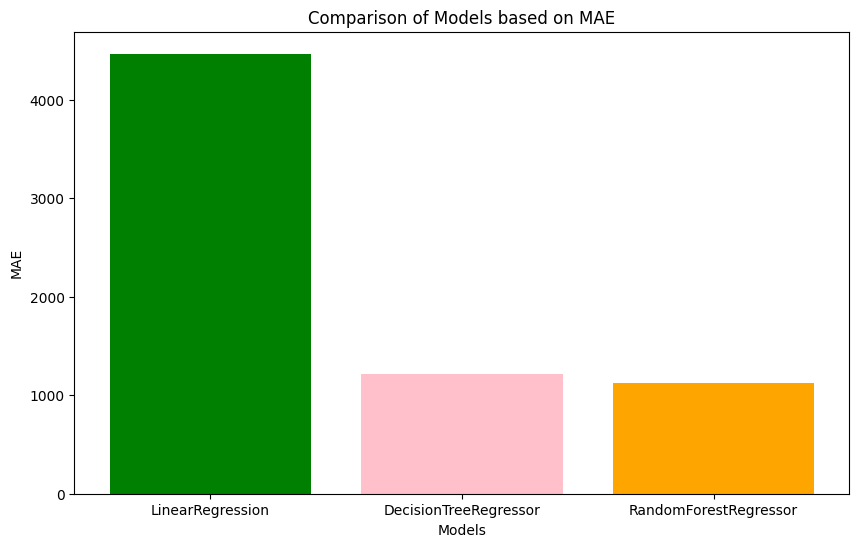

In [49]:
# MAE values for different models
models = ['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor' ]
MAE = [4468.426673542113, 1217.1550254590684,1123.8247602112526]
# Set the figure size
plt.figure(figsize=(10, 6))
colors = ['green', 'pink', 'orange']
# Create a bar plot
plt.bar(models, MAE, color=colors)
# Add labels and title
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('Comparison of Models based on MAE')
# Show the plot
plt.show()

In [ ]:
#COMPARISION OF DIFFERENT MODEL AS PER MEAN PERCENTAGE ABSOLUTE ERROR

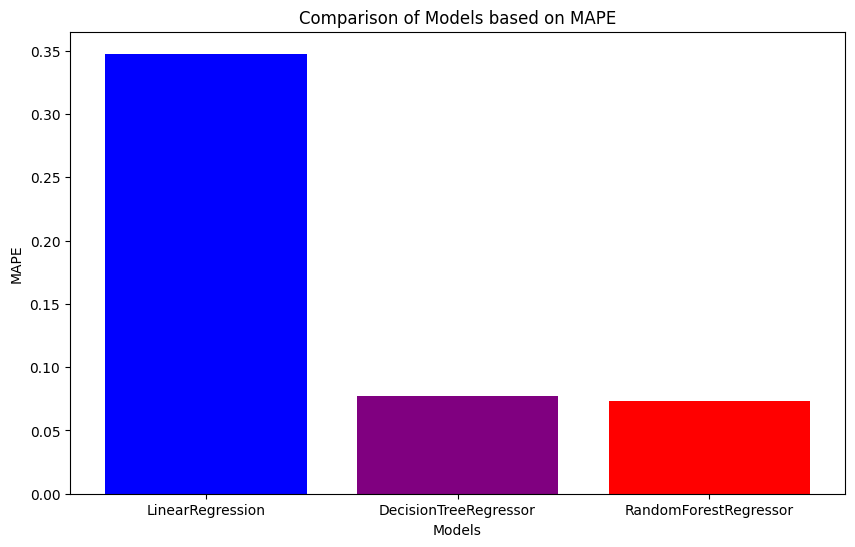

In [50]:
# MAPE values for different models
models = ['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor' ]
MAPE = [0.34765804610681816, 0.07726568550667867,0.07355428620976769]
# Set the figure size
plt.figure(figsize=(10, 6))
colors = ['blue', 'purple', 'red']
# Create a bar plot
plt.bar(models, MAPE, color=colors)
# Add labels and title
plt.xlabel('Models')
plt.ylabel('MAPE')
plt.title('Comparison of Models based on MAPE')
# Show the plot
plt.show()


In [ ]:
# COMPARISION OF DIFFERENT MODEL AS PER DIFFERENT MEAN SQUARE ERROR

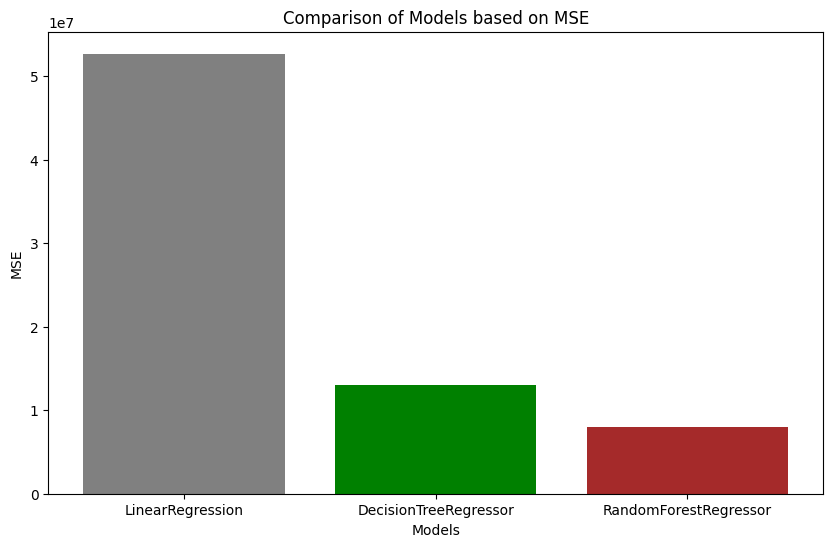

In [51]:
# MSE values for different models
models = ['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor' ]
MSE = [52706651.33334208,13061882.718802692,7976089.060927906]
# Set the figure size
plt.figure(figsize=(10, 6))
colors = ['grey', 'green', 'brown']
# Create a bar plot
plt.bar(models, MSE, color=colors)
# Add labels and title
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Comparison of Models based on MSE')
# Show the plot
plt.show()

In [ ]:
# COMPARISION OF DIFFERENT MODEL AS PER ROOT MEAN SQUARE ERRO

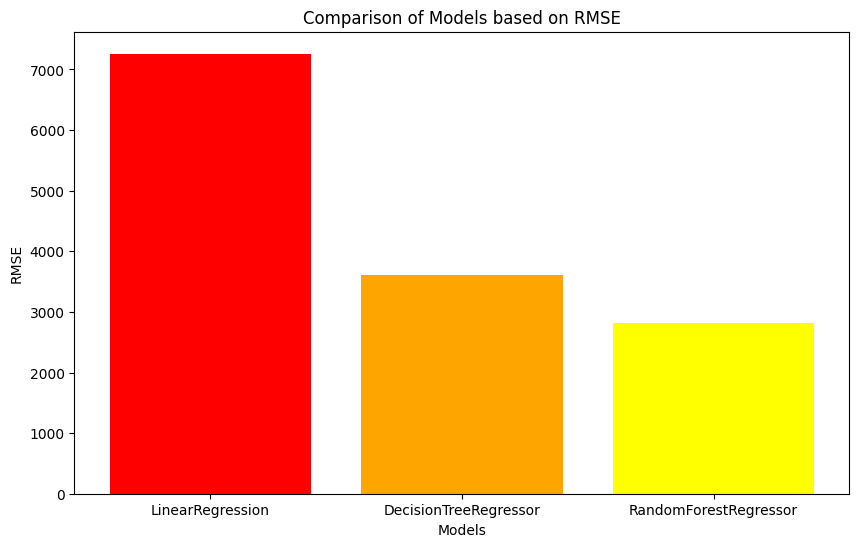

In [52]:
# RMSE values for different models
models = ['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor' ]
RMSE = [7259.934664536733,3614.122676224853,2824.19706481823]
# Set the figure size
plt.figure(figsize=(10, 6))
colors = ['red', 'orange', 'yellow']
# Create a bar plot
plt.bar(models, RMSE, color=colors)
# Add labels and title
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparison of Models based on RMSE')
# Show the plot
plt.show()
